<a href="https://colab.research.google.com/github/arpitarumma/NeuralNetworkmodels/blob/main/NNDL10cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)
Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 59s 292ms/step - accuracy: 0.2659 - loss: 1.9896 - val_accuracy: 0.4985 - val_loss: 1.4131
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 53s 271ms/step - accuracy: 0.4630 - loss: 1.4853 - val_accuracy: 0.5522 - val_loss: 1.2599
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 86s 289ms/step - accuracy: 0.5151 - loss: 1.3541 - val_accuracy: 0.5795 - val_loss: 1.1778
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 79s 274ms/step - accuracy: 0.5483 - loss: 1.2711 - val_accuracy: 0.6035 - val_loss: 1.1221
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 87s 295ms/step - accuracy: 0.5716 - loss: 1.2036 - val_accuracy: 0.6156 - val_loss: 1.0873
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 76s 270ms/step - accuracy: 0.5950 - loss: 1.1458 - val_accuracy: 0.6440 - val_loss: 1.0200
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 54s 273ms/step - accuracy: 0.6100 - loss: 1.1050 - val_accuracy: 0.6586 - val_loss: 0.9837
Epoc

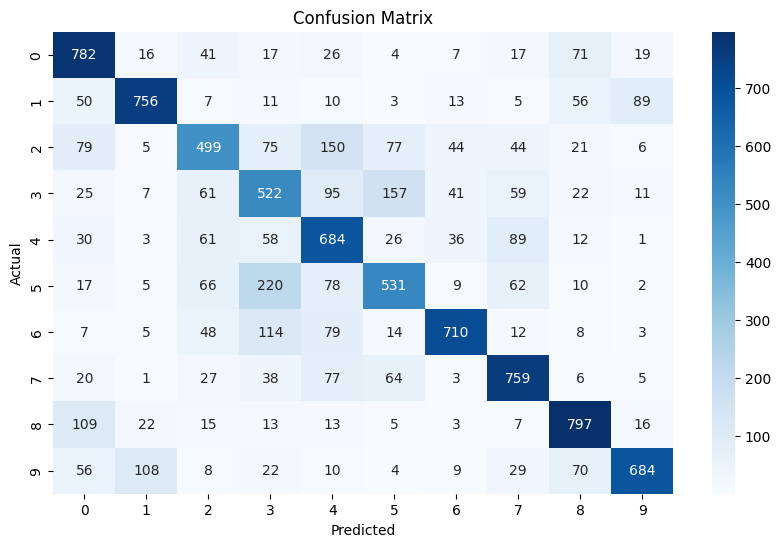

In [2]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Conv2DTranspose
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Set random seeds for reproducibility
SEED_VALUE = 42
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Display dataset shape
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# Normalize the dataset (Rescaling between 0 and 1)
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define dataset configurations
class DatasetConfig:
    NUM_CLASSES = 10
    IMG_HEIGHT = 32
    IMG_WIDTH = 32
    NUM_CHANNELS = 3

# Define training configurations
class TrainingConfig:
    EPOCHS = 10
    BATCH_SIZE = 256
    LEARNING_RATE = 0.001

# Build CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 output classes
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=TrainingConfig.LEARNING_RATE),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    epochs=TrainingConfig.EPOCHS,
                    batch_size=TrainingConfig.BATCH_SIZE,
                    validation_data=(X_test, y_test))

# Model evaluation
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification report
print("\nClassification Report:\n", classification_report(y_true_classes, y_pred_classes))

# Confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
